<a href="https://colab.research.google.com/github/shikhass2021/CV-Practicals/blob/main/2147153_CV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab-7 Illustrate Wavelet transform.

1. Apply Discrete Wavelet Transform to image, extract and display different frequency bands like LL,LH,HL,HH
2. Apply the following wavelets to the same image and interpret the result

i) Haar

ii) Daubechies

iii) Bi-orthogonal

IV) Coiflets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shikha.jpg to shikha.jpg


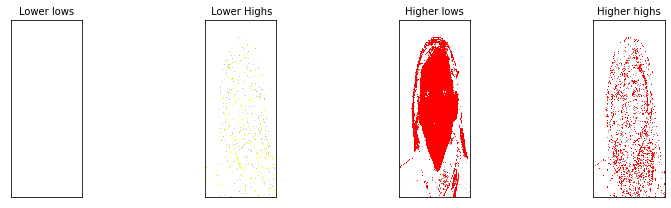

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2


# Load image
original = cv2.imread("shikha.jpg",cv2.IMREAD_COLOR)

# Wavelet transform of image, and plot approximation and details
titles = ['Lower lows', ' Lower Highs',
          'Higher lows', 'Higher highs']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


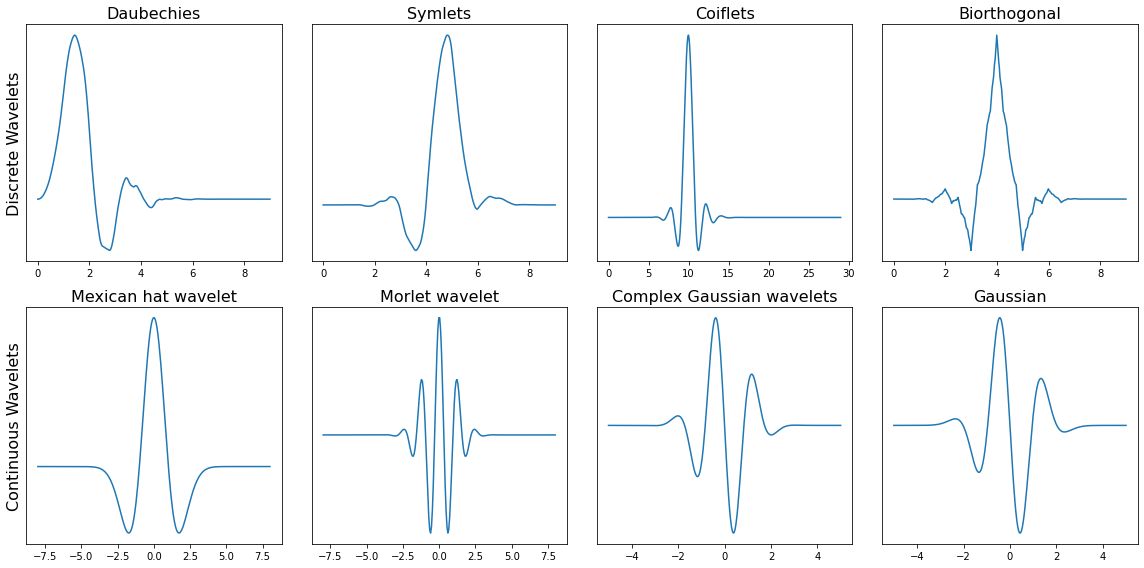

In [ ]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 14.6 MB/s 


Image


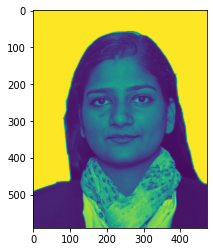

Image with haar transform


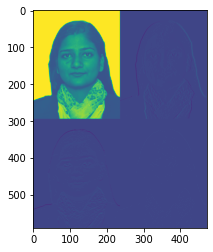

In [ ]:
# importing required libraries
import mahotas
from pylab import imshow, show
import os

# filtering image
img = original[:, :, 0]


# showing image
print("Image")

imshow(img)
show()

# haar transform
h = mahotas.haar(img)

# showing image
print("Image with haar transform")
imshow(h)
show()

Image


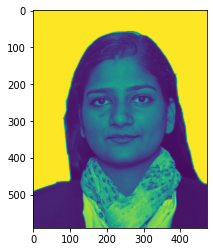

Daubechies - Transformed Image


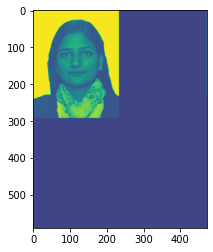

In [ ]:
# showing image
print("Image")
plt.imshow(img)
plt.show()

# Transform using D8 Wavelet to obtain transformed image t
t = mahotas.daubechies(img, 'D8')

# showing transformed image
print("Daubechies - Transformed Image")
plt.imshow(t)
plt.show()